# **NYC Taxicab Tip Prediction**




Project 1: Taxicab Tip Prediction (Part 1)

Build a prediction pipeline to estimate tip amounts from taxicab trips. For this project you might make use of publicly-available data such as the NYC Taxi and Limousine Com- mission Trip Record Data.16
This project is mostly intended to introduce the end-to-end approach of ex- ploring a new dataset, extracting meaningful information from it, and compar- ing alternative models. We break this down into the following parts:

Green taxi January 2018 data has been used in this case study.It contains around 793529 data points and 19 variables .

In [253]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [275]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("green taxi 2018.csv") 
df.head()

Saving green taxi 2018.csv to green taxi 2018 (3).csv


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,NaN,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


PART : 1




```
1. First,conduct exploratory analysis of the data.Just as we have done through- out the chapter, plot the relationship between the output (tip amount), and various features that you think might be related to this outcome. 
2. Based on the above analysis, consider what features might be useful for prediction. Consider, for example, features associated with the time of the trip, the start and end location, and the duration/distance of the trip.
3. How should the above features be represented or transformed? For example, how can the timestamp be represented to capture variation at the level of time of day, day of week, or even the time of year . how might you represent the start and end locations? Are there any useful derived features that are useful for prediction, e.g. speed = distance/duration?
4. Is it useful to transform the output variable (sec. 2.3.5)? For example, rather than predicting the tip amount, it may make more sense to predict the tip percentage
```



1. In the exploratory analysis part of data , I have checked for missing values present in the data.The variation within the data .There are a lot of negetive values in the data , i have tried treating those data buy dropping all the values beyond 3rd quartile range.To under more about the date i tried to visualize using bar graphs , boxplots based on distributioin of fare amount , tip amount , dependence of tip amount on trip duration.To check for relationship between variables i have used correlation matrix. 

---
2. Based on the above analysis , distance of the trip and duration of the trip would be one of the useful feature to determmine the tip amount in the future.

---
3. I have used the timestamp variable to capture th evariations at the level of day of week and hour of the day.Further, using the trip distance and the trip duration average speed of the trip is calculated .


---
4. I would agree with creating a new feature called tip percentage and try to predict th epercentage of tip that one could recieve from the trip.






In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793529 entries, 0 to 793528
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               793529 non-null  int64  
 1   lpep_pickup_datetime   793529 non-null  object 
 2   lpep_dropoff_datetime  793529 non-null  object 
 3   store_and_fwd_flag     793529 non-null  object 
 4   RatecodeID             793529 non-null  int64  
 5   PULocationID           793529 non-null  int64  
 6   DOLocationID           793529 non-null  int64  
 7   passenger_count        793529 non-null  int64  
 8   trip_distance          793529 non-null  float64
 9   fare_amount            793529 non-null  float64
 10  extra                  793529 non-null  float64
 11  mta_tax                793529 non-null  float64
 12  tip_amount             793529 non-null  float64
 13  tolls_amount           793529 non-null  float64
 14  ehail_fee              0 non-null   

In [277]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,793529.000000,0.0,793529.000000,793529.000000,793529.000000,793526.000000
mean,1.826479,1.074520,110.042243,128.640492,1.362568,2.665767,11.735637,0.339561,0.487992,1.036160,0.085211,NaN,0.293034,14.004577,1.475495,1.018199
std,0.378697,0.565088,74.427252,77.165897,1.046734,2.845330,10.165305,0.395055,0.083866,1.894866,1.021389,NaN,0.049651,11.090961,0.521846,0.133669
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-183.000000,-4.500000,-0.500000,-2.720000,0.000000,NaN,-0.300000,-183.000000,1.000000,1.000000
25%,2.000000,1.000000,49.000000,61.000000,1.000000,0.990000,6.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.700000,9.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.800000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,193.000000,1.000000,3.270000,14.000000,0.500000,0.500000,1.760000,0.000000,NaN,0.300000,16.800000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,140.620000,2126.000000,4.500000,0.500000,295.000000,557.550000,NaN,0.300000,2126.800000,5.000000,2.000000


In [278]:
#checking the Number of Na values in each variable
print("\nNumber of missing values of the said dataframe:")
missing_values = df.isna().sum()
print (missing_values)



Number of missing values of the said dataframe:
VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag            0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
passenger_count               0
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                793529
improvement_surcharge         0
total_amount                  0
payment_type                  0
trip_type                     3
dtype: int64


In [279]:
#Dropping column ehail_fee variable as it contains only NA values
df = df.drop(columns =['ehail_fee']) 

In [280]:
# changing the datatype from object to datetime for further use it for capturing variation at the different level
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [281]:
#Using timestamp variable to capture new derived feature Pickup/dropoff hour
df['pickup_hour'] = df.lpep_pickup_datetime.dt.hour

df['Dropoff_hour'] = df.lpep_dropoff_datetime.dt.hour

In [282]:
New_df = df

Checking for the variation in the data and how they are distributed

In [283]:
#Checking for the variation in the data to further trim the variables with outliers.
print("Highest allowed fare ",New_df['fare_amount'].mean() + 3*New_df['fare_amount'].std())
print("Lowest allowed fare",New_df['fare_amount'].mean() - 3*New_df['fare_amount'].std())

print("Highest allowed xtra ",New_df['extra'].mean() + 3*New_df['extra'].std())
print("Lowest allowed xtra",New_df['extra'].mean() - 3*New_df['extra'].std())

print("Highest allowed tip ",New_df['tip_amount'].mean() + 3*New_df['tip_amount'].std())
print("Lowest allowed tip",New_df['tip_amount'].mean() - 3*New_df['tip_amount'].std())

print("Highest allowed tolls_amount ",New_df['tolls_amount'].mean() + 3*New_df['tolls_amount'].std())
print("Lowest allowed tolls_amount",New_df['tolls_amount'].mean() - 3*New_df['tolls_amount'].std())

print("Highest allowed tatal ",New_df['total_amount'].mean() + 3*New_df['total_amount'].std())
print("Lowest allowed total",New_df['total_amount'].mean() - 3*New_df['total_amount'].std())

Highest allowed fare  42.23155192574793
Lowest allowed fare -18.760277151921187
Highest allowed xtra  1.5247274293603925
Lowest allowed xtra -0.8456049272212143
Highest allowed tip  6.720756924130842
Lowest allowed tip -4.6484377524314455
Highest allowed tolls_amount  3.149379187015919
Lowest allowed tolls_amount -2.978956228308663
Highest allowed tatal  47.277460259922044
Lowest allowed total -19.268306265444345


In [284]:
#considering data based on these important filter

New_df = New_df[New_df['fare_amount'].between(0, 43)]
New_df = New_df[New_df['tip_amount'].between(0.1, 7)]


In [285]:
New_df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_hour,Dropoff_hour
count,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000,304327.000000
mean,1.803179,1.023498,109.805167,134.851876,1.363770,2.517399,11.138008,0.366367,0.497048,2.378990,0.067585,0.298302,14.808645,1.000128,1.005833,14.171046,14.196187
std,0.397597,0.304682,75.124564,78.188858,1.059022,2.106345,6.500193,0.388821,0.038308,1.288649,0.619497,0.022503,7.681280,0.017481,0.076148,6.219757,6.290321
min,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,49.000000,65.000000,1.000000,1.050000,6.500000,0.000000,0.500000,1.460000,0.000000,0.300000,9.300000,1.000000,1.000000,10.000000,10.000000
50%,2.000000,1.000000,80.000000,138.000000,1.000000,1.800000,9.000000,0.500000,0.500000,2.000000,0.000000,0.300000,12.360000,1.000000,1.000000,16.000000,16.000000
75%,2.000000,1.000000,166.000000,210.000000,1.000000,3.270000,14.000000,0.500000,0.500000,3.000000,0.000000,0.300000,18.350000,1.000000,1.000000,19.000000,19.000000
max,2.000000,5.000000,265.000000,265.000000,9.000000,18.000000,43.000000,1.000000,0.500000,7.000000,20.000000,0.300000,65.000000,4.000000,2.000000,23.000000,23.000000


In [286]:
New_df['payment_type'].value_counts()
New_df['payment_type'] = New_df['payment_type'].map({1:1 , 2:2 ,3:3 ,4:3 ,5:3})

In [287]:
New_df['RatecodeID'].value_counts()

1    302522
5      1747
4        47
3        11
Name: RatecodeID, dtype: int64

Using Timestamp to create new feature called Time duration.
Binning different time durations 


In [288]:
#Using Timestamp to create new feature called Time duration.
difference_time = New_df['lpep_dropoff_datetime'] - New_df['lpep_pickup_datetime']
New_df['trip_duration'] = difference_time/np.timedelta64(1,'m')

In [289]:
New_df['trip_duration'].value_counts()

5.316667       504
6.666667       469
5.650000       455
5.816667       444
6.166667       443
              ... 
63.033333        1
67.066667        1
591.233333       1
1403.833333      1
1416.333333      1
Name: trip_duration, Length: 4420, dtype: int64

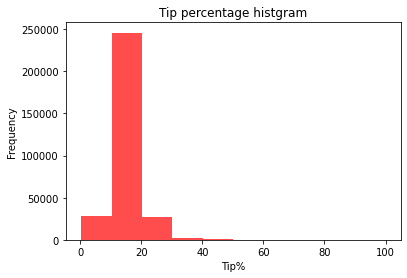

In [290]:
# Transforming the output variable to a new feature Tip percentage.

tip = 100 * (New_df['tip_amount'] / New_df['total_amount'])
tip.describe()
tip.isnull().sum()
tip.plot.hist(alpha=0.7,color='r')
plot.title('Tip percentage histgram')
plot.xlabel('Tip%')
plot.ylabel('Frequency')

New_df['tip_pct'] = tip


In [291]:
New_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_hour,Dropoff_hour,trip_duration,tip_pct
7,2,2018-01-01 00:38:02,2018-01-01 00:55:02,N,1,189,225,5,3.45,14.5,0.5,0.5,3.16,0.0,0.3,18.96,1,1.0,0,0,17.000000,16.666667
13,2,2018-01-01 00:57:59,2018-01-01 01:12:26,N,1,97,188,1,2.71,11.5,0.5,0.5,3.84,0.0,0.3,16.64,1,1.0,0,1,14.450000,23.076923
14,2,2018-01-01 00:36:58,2018-01-01 00:51:08,N,1,244,75,2,6.01,19.0,0.5,0.5,4.00,0.0,0.3,24.30,1,1.0,0,0,14.166667,16.460905
15,1,2018-01-01 00:07:40,2018-01-01 00:15:20,N,1,225,37,1,1.90,8.0,0.5,0.5,3.00,0.0,0.3,12.30,1,1.0,0,0,7.666667,24.390244
16,1,2018-01-01 00:25:09,2018-01-01 00:42:04,N,1,36,145,2,4.30,15.5,0.5,0.5,3.35,0.0,0.3,20.15,1,1.0,0,0,16.916667,16.625310


In [292]:
#Binning the time duration of the trip to create new feature.

time_binning = np.array([0,5,10,15,20,45])
New_df['trip_duration'] = pd.cut(New_df.trip_duration , time_binning, labels = ["<5" ,"5-10" ,"10-15" ,"15-20" ,">20"])

New_df['trip_duration'].value_counts()

trip_duration = pd.get_dummies(New_df['trip_duration'])
trip_duration.head()


#One hot encoding of this new categorical feature 
quick_ride = trip_duration.iloc[:,:1].max(axis =1)
Vshort_ride  = trip_duration.iloc[:,:2].max(axis =1)
short_ride  = trip_duration.iloc[:,:3].max(axis =1)
medium_ride  = trip_duration.iloc[:,:4].max(axis =1)
long_ride  = trip_duration.iloc[:,:5].max(axis =1)

trip_duration.columns = ['quick_ride' ,'Vshort_ride' ,'short_ride' ,'medium_ride','long_ride']

New_df = pd.concat([New_df,quick_ride ,Vshort_ride ,short_ride,medium_ride,long_ride] , axis = 1)

New_df.columns = ['VendorID',	'lpep_pickup_datetime',	'lpep_dropoff_datetime','	store_and_fwd_flag',	'RatecodeID',	'PULocationID','DOLocationID',	'passenger_count','trip_distance',	'fare_amount'	,'extra',	'mta_tax',	'tip_amount',	'tolls_amount',	'improvement_surcharge'	,'total_amount','payment_type',	'trip_type',	'pickup_hour',	'Dropoff_hour',	'trip_duration' ,'tip_pct','quick_ride' ,'Vshort_ride' ,'short_ride' ,'medium_ride','long_ride']

New_df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,\tstore_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_hour,Dropoff_hour,trip_duration,tip_pct,quick_ride,Vshort_ride,short_ride,medium_ride,long_ride
7,2,2018-01-01 00:38:02,2018-01-01 00:55:02,N,1,189,225,5,3.45,14.5,0.5,0.5,3.16,0.0,0.3,18.96,1,1.0,0,0,15-20,16.666667,0,0,0,1,1
13,2,2018-01-01 00:57:59,2018-01-01 01:12:26,N,1,97,188,1,2.71,11.5,0.5,0.5,3.84,0.0,0.3,16.64,1,1.0,0,1,10-15,23.076923,0,0,1,1,1
14,2,2018-01-01 00:36:58,2018-01-01 00:51:08,N,1,244,75,2,6.01,19.0,0.5,0.5,4.00,0.0,0.3,24.30,1,1.0,0,0,10-15,16.460905,0,0,1,1,1
15,1,2018-01-01 00:07:40,2018-01-01 00:15:20,N,1,225,37,1,1.90,8.0,0.5,0.5,3.00,0.0,0.3,12.30,1,1.0,0,0,5-10,24.390244,0,1,1,1,1
16,1,2018-01-01 00:25:09,2018-01-01 00:42:04,N,1,36,145,2,4.30,15.5,0.5,0.5,3.35,0.0,0.3,20.15,1,1.0,0,0,15-20,16.625310,0,0,0,1,1


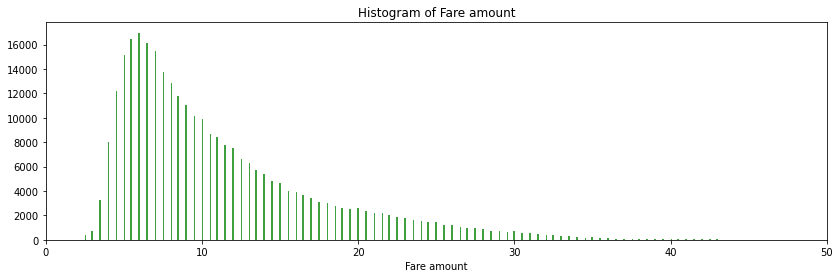

In [415]:
#Distribution of Fare amount
from matplotlib import patches
plot.figure(figsize= (14 ,4))
n,bins,patches = plot.hist(New_df.fare_amount , 500 , facecolor = 'green' , alpha = 0.75)
plot.xlabel('Fare amount')
plot.title('Histogram of Fare amount')
plot.xlim(0,50)
plot.show();

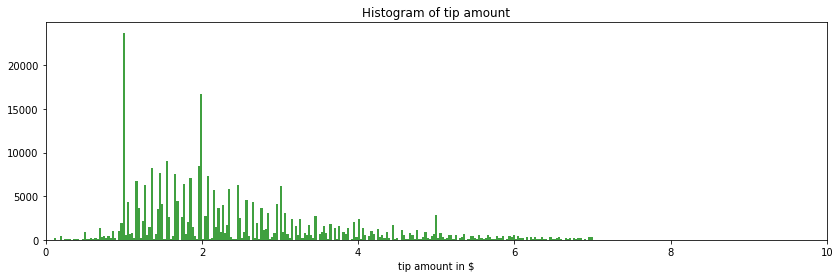

In [413]:
#Distribution of tip amount

from matplotlib import patches
plot.figure(figsize= (14 ,4))
n,bins,patches = plot.hist(New_df.tip_amount , 250 , facecolor = 'green' , alpha = 0.75)
plot.xlabel('tip amount in $')
plot.title('Histogram of tip amount')
plot.xlim(0,10)
plot.show();

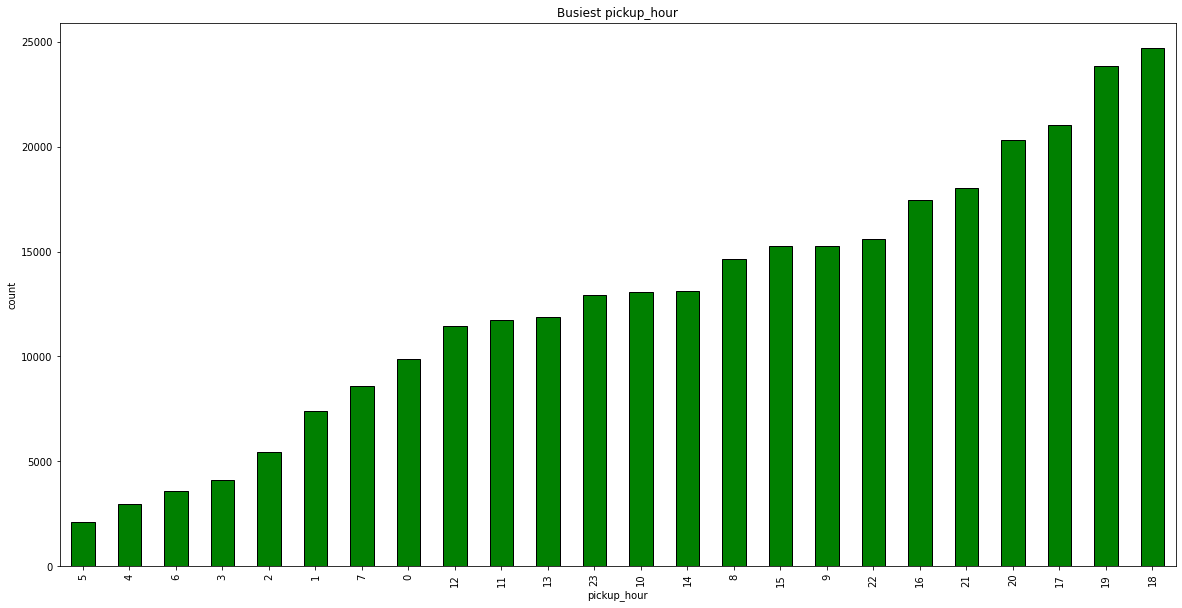

In [297]:
#Checking for pick up hours of the day

plot.figure(figsize= (20 ,10))
New_df['pickup_hour'].value_counts().sort_values().plot.bar(color = 'g' , edgecolor = 'k');
plot.title('Busiest pickup_hour');plot.xlabel('pickup_hour');plot.ylabel('count');

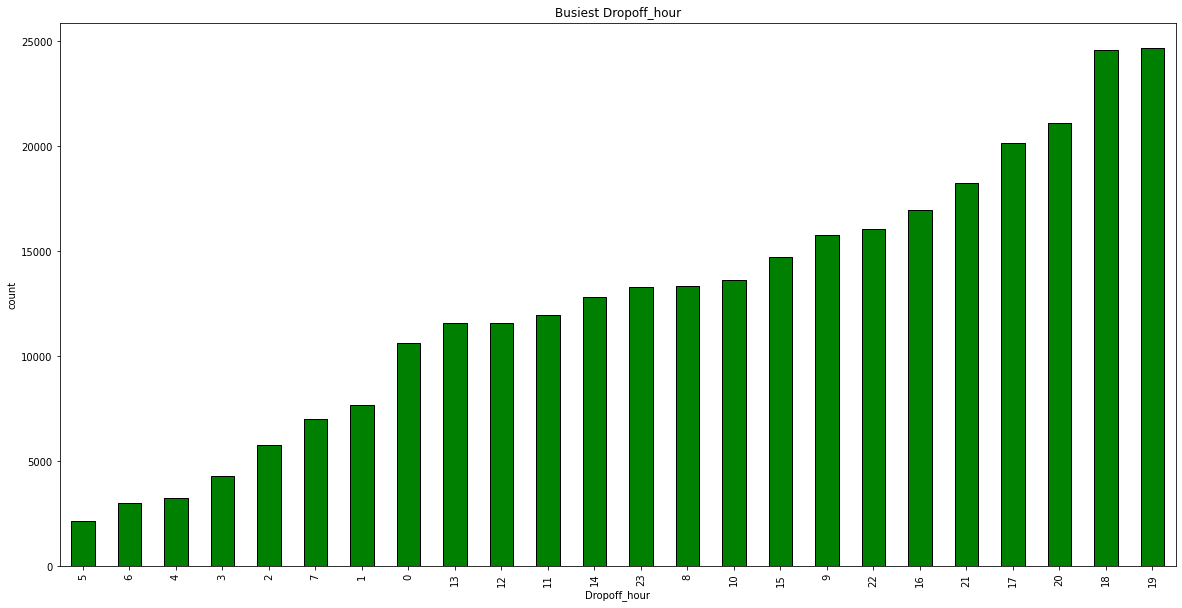

In [296]:
#Checking for Busy Dropoff hours of the day

plot.figure(figsize= (20 ,10))
New_df['Dropoff_hour'].value_counts().sort_values().plot.bar(color = 'g' , edgecolor = 'k');
plot.title('Busiest Dropoff_hour');plot.xlabel('Dropoff_hour');plot.ylabel('count');

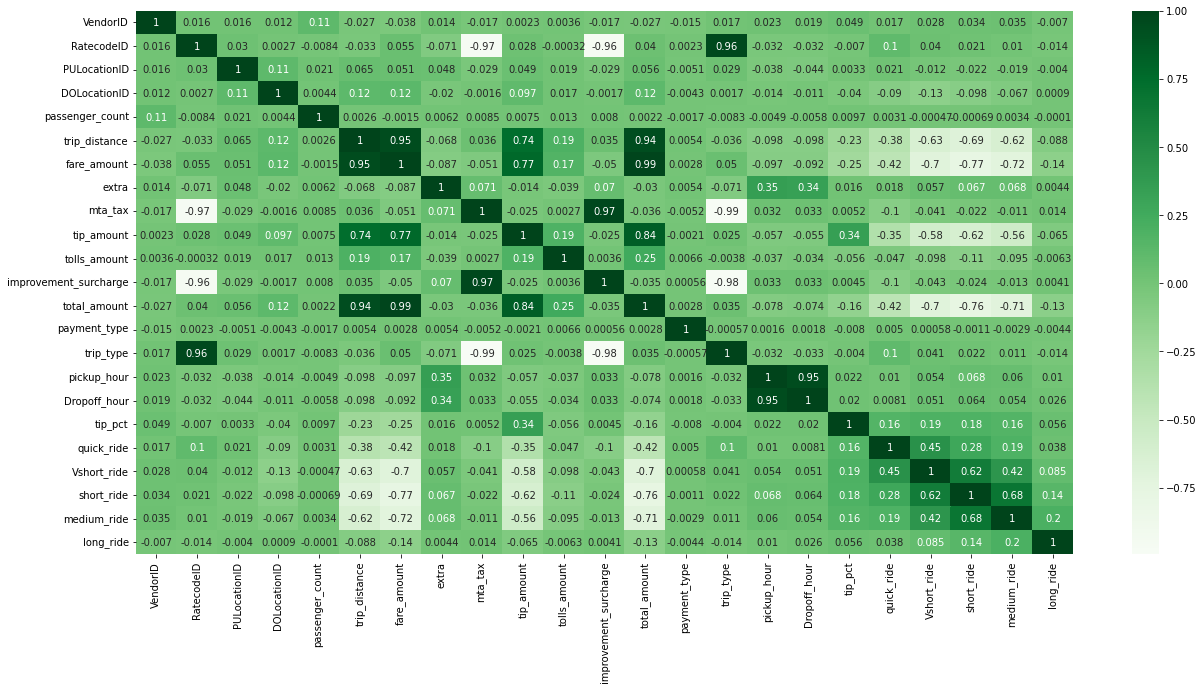

In [298]:
#calculating the correlation between different variables with the target variable to pick pick features to build prediction model
corr = New_df.corr()
plot.figure(figsize=(21,10))
sns.heatmap(corr, cmap="Greens",annot=True)
plot.show()

Splitting data into train test and validation set , 50% , 25% and 25% of data distributed across each 

In [299]:
New_df.head(100)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,\tstore_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_hour,Dropoff_hour,trip_duration,tip_pct,quick_ride,Vshort_ride,short_ride,medium_ride,long_ride
7,2,2018-01-01 00:38:02,2018-01-01 00:55:02,N,1,189,225,5,3.45,14.5,0.5,0.5,3.16,0.00,0.3,18.96,1,1.0,0,0,15-20,16.666667,0,0,0,1,1
13,2,2018-01-01 00:57:59,2018-01-01 01:12:26,N,1,97,188,1,2.71,11.5,0.5,0.5,3.84,0.00,0.3,16.64,1,1.0,0,1,10-15,23.076923,0,0,1,1,1
14,2,2018-01-01 00:36:58,2018-01-01 00:51:08,N,1,244,75,2,6.01,19.0,0.5,0.5,4.00,0.00,0.3,24.30,1,1.0,0,0,10-15,16.460905,0,0,1,1,1
15,1,2018-01-01 00:07:40,2018-01-01 00:15:20,N,1,225,37,1,1.90,8.0,0.5,0.5,3.00,0.00,0.3,12.30,1,1.0,0,0,5-10,24.390244,0,1,1,1,1
16,1,2018-01-01 00:25:09,2018-01-01 00:42:04,N,1,36,145,2,4.30,15.5,0.5,0.5,3.35,0.00,0.3,20.15,1,1.0,0,0,15-20,16.625310,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2,2018-01-01 00:28:56,2018-01-01 00:45:28,N,1,42,146,1,5.33,18.5,0.5,0.5,5.11,5.76,0.3,30.67,1,1.0,0,0,15-20,16.661232,0,0,0,1,1
256,2,2018-01-01 00:13:57,2018-01-01 00:27:01,N,1,223,82,1,3.02,12.5,0.5,0.5,2.76,0.00,0.3,16.56,1,1.0,0,0,10-15,16.666667,0,0,1,1,1
262,2,2018-01-01 00:49:35,2018-01-01 01:01:39,N,1,256,61,1,3.02,11.5,0.5,0.5,2.56,0.00,0.3,15.36,1,1.0,0,1,10-15,16.666667,0,0,1,1,1
267,1,2018-01-01 00:24:25,2018-01-01 00:39:06,N,1,65,225,1,4.00,15.0,0.5,0.5,2.00,0.00,0.3,18.30,1,1.0,0,0,10-15,10.928962,0,0,1,1,1


`PART 2 `


```
1. Carefully build a complete model pipeline.That is,split your data into train, validation, and test portions, and build a pipeline so that all models are trained on the training set and comparisons among models are performed on the validation set (similar to Exercise 3.4). Consider different ways to split the data, e.g. is it better to split the data randomly, or is it better to withhold the most recent observations for testing for the sake of selecting the model most capable of forecasting future trends?

2. Rather than modeling the task as a regression problem, you could cast the problem as classification by estimating whether a tip will be above or below the median; this may be less sensitive to outliers. Consider the advantages and disadvantages of various formulations as well as what evaluation met- rics you might use.

3.  Some of the features we used in Project 1 are potentially quite high di- mensional, e.g. if we encode timestamps using one-hot encodings for each possible day of the year, our model might be highly effective at capturing single-day trends (such as major holidays), but could also be prone to over- fitting. Use your pipeline to select the best feature representation among alternatives (e.g. different levels of granularity for your temporal features, or otherwise), and to incorporate a regularizer into your model.
```



1. Using sklearn i have tried to split data into train test and validation dataset (50% , 25% , 25%) respetively by splitting the data randomly. The method of splitting the data such that all the recent observations are used fir testing and latest being used for training , this can be done in one of the random states .This approach would also give us a similar result  but there is less randomness and problems like having unbalanced dataset is also possible , which might give us a bit of biased result.

 Feature scaling has been performed to help scalin gof values in each variable.The splitting of data should have been done in a 70-15-15 way so that we could train on a larger dataset further helping us for a more accurate prediction

 Decision Tree regressor model is being build.The training is done on the train dataset and validation data has been used to predict the result.The performance/accuracy of the model is being measured using RMSE value(1.9).

2. To make this problem as a classification problem i made a new varaible called Above median and Below Median , it tells us if the tip recieved is above the median range of of all the tips recieved.I agree that it would be less sensitive to outliers .I have considered using a confusion matrix to evaluate the performance of the model.It gives around 83% accurancy .

3. Feature encoding is done on one of the categorical variable "Trip duration".
They are being divided into 5 categories and all of those features are being considerd for building a model. 


**Model Building**

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [301]:
New_df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       '\tstore_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'pickup_hour', 'Dropoff_hour',
       'trip_duration', 'tip_pct', 'quick_ride', 'Vshort_ride', 'short_ride',
       'medium_ride', 'long_ride'],
      dtype='object')

In [375]:
#Splitting data into train test and validation set 
Xnames = ['trip_distance',	'fare_amount'	,'extra',	'mta_tax','tolls_amount',	'improvement_surcharge'	,	'quick_ride' ,'Vshort_ride' ,'short_ride' ,'medium_ride','long_ride']

X = New_df[Xnames]
y = New_df["tip_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [376]:
#Using standard scaler for scaling varaibles
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [377]:
#to check the split data
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_valid.shape))
print("y val shape: {}".format(y_valid.shape))

X_train shape: (152163, 11)
X_test shape: (76082, 11)
y_train shape: (152163,)
y_test shape: (76082,)
X_val shape: (76082, 11)
y val shape: (76082,)


In [378]:
#Building Model using Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

In [379]:
#Predicting the model 
y_valid_pred = regressor.predict(X_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [380]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid, y_valid_pred)
rmse = math.sqrt(mse)
print(rmse)

1.9682892624177344


Casting the problem as classification by estimating whether a tip will be above or below the median

In [381]:
#Creating new feature called above or below a median tip across the dataset
New_df['tip_range'] = 'Above Median'
New_df.loc[(New_df['tip_amount'] > 0) & (New_df['tip_amount'] <= 2.0), 'tip_range'] = 'Below Median'
New_df.loc[(New_df['tip_amount'] > 10) & (New_df['tip_amount'] <= 50), 'tip_range'] = 'Above Median'
print(New_df)

        VendorID lpep_pickup_datetime  ... long_ride     tip_range
7              2  2018-01-01 00:38:02  ...         1  Above Median
13             2  2018-01-01 00:57:59  ...         1  Above Median
14             2  2018-01-01 00:36:58  ...         1  Above Median
15             1  2018-01-01 00:07:40  ...         1  Above Median
16             1  2018-01-01 00:25:09  ...         1  Above Median
...          ...                  ...  ...       ...           ...
793512         2  2018-01-31 23:10:30  ...         1  Below Median
793513         2  2018-01-31 23:17:52  ...         1  Above Median
793515         2  2018-01-31 23:44:12  ...         1  Above Median
793517         2  2018-01-31 23:19:27  ...         1  Above Median
793521         2  2018-01-31 23:38:46  ...         1  Above Median

[304327 rows x 28 columns]


In [382]:
New_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,\tstore_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_hour,Dropoff_hour,trip_duration,tip_pct,quick_ride,Vshort_ride,short_ride,medium_ride,long_ride,tip_range
7,2,2018-01-01 00:38:02,2018-01-01 00:55:02,N,1,189,225,5,3.45,14.5,0.5,0.5,3.16,0.0,0.3,18.96,1,1.0,0,0,15-20,16.666667,0,0,0,1,1,Above Median
13,2,2018-01-01 00:57:59,2018-01-01 01:12:26,N,1,97,188,1,2.71,11.5,0.5,0.5,3.84,0.0,0.3,16.64,1,1.0,0,1,10-15,23.076923,0,0,1,1,1,Above Median
14,2,2018-01-01 00:36:58,2018-01-01 00:51:08,N,1,244,75,2,6.01,19.0,0.5,0.5,4.00,0.0,0.3,24.30,1,1.0,0,0,10-15,16.460905,0,0,1,1,1,Above Median
15,1,2018-01-01 00:07:40,2018-01-01 00:15:20,N,1,225,37,1,1.90,8.0,0.5,0.5,3.00,0.0,0.3,12.30,1,1.0,0,0,5-10,24.390244,0,1,1,1,1,Above Median
16,1,2018-01-01 00:25:09,2018-01-01 00:42:04,N,1,36,145,2,4.30,15.5,0.5,0.5,3.35,0.0,0.3,20.15,1,1.0,0,0,15-20,16.625310,0,0,0,1,1,Above Median
19,2,2018-01-01 00:34:53,2018-01-01 00:52:55,N,1,40,113,1,4.47,16.5,0.5,0.5,3.56,0.0,0.3,23.31,1,1.0,0,0,15-20,15.272415,0,0,0,1,1,Above Median
23,1,2018-01-01 00:11:41,2018-01-01 00:22:10,N,1,255,112,1,1.90,9.0,0.5,0.5,3.05,0.0,0.3,13.35,1,1.0,0,0,10-15,22.846442,0,0,1,1,1,Above Median
24,1,2018-01-01 00:40:32,2018-01-01 01:01:20,N,1,255,28,1,10.30,29.0,0.5,0.5,5.00,0.0,0.3,35.30,1,1.0,0,1,>20,14.164306,0,0,0,0,1,Above Median
25,2,2018-01-01 00:15:30,2018-01-01 00:25:17,N,1,80,80,1,1.66,8.5,0.5,0.5,1.96,0.0,0.3,11.76,1,1.0,0,0,5-10,16.666667,0,1,1,1,1,Below Median
26,2,2018-01-01 00:35:44,2018-01-01 00:48:23,N,1,255,232,1,2.91,12.0,0.5,0.5,3.32,0.0,0.3,16.62,1,1.0,0,0,10-15,19.975933,0,0,1,1,1,Above Median


Decision Tree Classifier

In [383]:
#Data with target variable as tip_range (classification problem)
Xnames =  ['trip_distance',	'fare_amount'	,'extra',	'mta_tax','tolls_amount',	'improvement_surcharge'	,	'quick_ride' ,'Vshort_ride' ,'short_ride' ,'medium_ride','long_ride']
X = New_df[Xnames]
y = New_df["tip_range"]

In [395]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size = 0.50)

In [397]:
#Scaling and transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [398]:
print(X_train)

[[ 0.28744963  0.43634338  0.3441398  ... -1.57419533  0.43003682
   0.08878178]
 [-0.46599268 -0.25446087  1.62974678 ...  0.63524518  0.43003682
   0.08878178]
 [ 0.22584743  0.2060753   0.3441398  ...  0.63524518  0.43003682
   0.08878178]
 ...
 [-0.115334   -0.10094881 -0.94146719 ...  0.63524518  0.43003682
   0.08878178]
 [-0.57024256 -0.79175306 -0.94146719 ...  0.63524518  0.43003682
   0.08878178]
 [-0.86403768 -0.94526512  0.3441398  ...  0.63524518  0.43003682
   0.08878178]]


In [399]:
print(y_train)

318731    Above Median
647195    Above Median
72250     Above Median
56965     Above Median
668025    Above Median
              ...     
489546    Above Median
637422    Below Median
340704    Above Median
711303    Below Median
314710    Below Median
Name: tip_range, Length: 152163, dtype: object


In [400]:
print(X_test)

        trip_distance  fare_amount  extra  ...  short_ride  medium_ride  long_ride
260224           2.42         10.0    0.5  ...           1            1          1
483207           2.40         10.5    0.0  ...           1            1          1
490883           1.40          8.0    0.0  ...           1            1          1
54634            0.89          5.0    0.0  ...           1            1          1
75940            2.91         12.5    0.0  ...           0            1          1
...               ...          ...    ...  ...         ...          ...        ...
623859           1.46          8.5    1.0  ...           1            1          1
619028           2.90         13.5    1.0  ...           0            1          1
532587           0.90          5.0    0.0  ...           1            1          1
713300           1.67          8.0    0.0  ...           1            1          1
668723           2.76         11.0    0.0  ...           1            1          1

[15

In [401]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [402]:
#Prediction
print(classifier.predict(sc.transform([[4.5,8.96,4,6,9,2,0,1,0,0,1]])))

['Below Median']


In [403]:
y_pred = classifier.predict(X_valid)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [404]:
y_pred

array(['Above Median', 'Above Median', 'Below Median', ...,
       'Below Median', 'Below Median', 'Above Median'], dtype=object)

In [405]:
#To check the performance of the model using confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_valid, y_pred)
print(cm)
m = accuracy_score(y_valid, y_pred)

[[61958 12256]
 [13316 64633]]


In [406]:
print("Performance of model: {}".format(m))

Performance of model: 0.8319433765107155
